# <font color='blue'>**LABORATORIO 2. Clasificación de imágenes usando CNN's**

<font color='red'>Integrantes (Máximo 4 personas):

<font color='red'>Diego Ivan Perea Montealegre - 2185751 o 2236468 </font>

<font color='red'> Samir Hassan Ordonñez  2190041</font>

<font color='red'>Carlos Ivan Osorio Moreno 223894</font>

<font color='red'>Gabriel Jeanot 2185887 </font>

Estudiar las Redes Neuronales Convolucionales (CNN) es beneficioso por varias razones:

* **Excelente Desempeño en Imágenes**: Las CNN han demostrado un rendimiento excepcional en tareas de visión computacional debido a su capacidad para capturar patrones locales y globales en imágenes.

* **Eficiencia en Términos de Parámetros**: Las CNN están diseñadas para aprovechar la estructura de las imágenes, utilizando capas convolucionales que comparten parámetros. Esto las hace mucho más eficientes en términos de la cantidad de parámetros requeridos en comparación con una red neuronal *FULLY CONNECTED*.

* **Invariancia a Traslaciones**: Las capas convolucionales permiten a las CNN aprender características invariantes a pequeñas traslaciones. Esto significa que la red puede reconocer patrones incluso si están ubicados en diferentes partes de una imagen.

* **Capacidad de Aprendizaje Jerárquico**: Las CNN tienen múltiples capas convolucionales y de agrupación que les permiten aprender características a diferentes niveles de abstracción. Las primeras capas pueden aprender bordes y texturas simples, mientras que las capas más profundas pueden aprender características más complejas y abstractas.

* **Transferencia de Conocimiento**: Las CNN entrenadas en grandes conjuntos de datos, como ImageNet, pueden ser utilizadas como puntos de partida para tareas de clasificación específicas. Esto se conoce como transferencia de conocimiento y puede ahorrar mucho tiempo y recursos en el entrenamiento de modelos.

* **Interpretabilidad Relativa**: Aunque las CNN no son tan interpretables como algunos otros modelos más simples, como árboles de decisión, se han desarrollado técnicas y herramientas para ayudar a comprender qué características están siendo detectadas por diferentes capas de la red.

Siga las instrucciones (<font color='red'>resaltadas en rojo </font>), las cuales además de guiarlo, generarán en suma el puntaje final obtenido para este laboratorio.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas.
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Vision-computador' # file kaggle.json saved in current directory

In [ ]:
# Vamos a usar el Human Action Recognition (HAR) Dataset de Kaggle

!kaggle datasets download -d meetnagadia/human-action-recognition-har-dataset

 99% 295M/297M [00:04<00:00, 36.8MB/s]
100% 297M/297M [00:04<00:00, 76.3MB/s]


<font color='red'>Punto 1 (1.0). Preprocesamiento</font>.

El pre-procesamiento de imagenes es una tarea fundamental cuando se desea que la IA trabaje correctamente.

(a) (0.25) Realice un código que le permita mostrar 5 imagenes por cada categoría seleccionadas del dataset.

(b) (0.25) Aunque el dataset ya se encuentra dividido en TRAIN y TEST, a partir del análisis visual realizado en el punto (a), usted deberá tomar la decisión acerca de trabajar el entrenamiento con todo el conjunto de imagenes dadas en TRAIN o con un subconjunto del mismo. Por otro lado usted deberá separar el 10% de las imagenes de TEST y dejarlas como una nueva carpeta de VALIDATION.

(c) (0.5) Realice un código que le permita pre-procesar el dataset. <font color='red'>Si usted decide no hacer ningun tipo de pre-procesamiento, usted deberá explicar claramente el porque usted consideró no necesario realizar este paso.


In [ ]:
mkdir /content/dataset

In [ ]:
cd /content/dataset

/content/dataset


In [ ]:
!unzip /content/human-action-recognition-har-dataset.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Act

In [ ]:
!mv "/content/dataset/Human Action Recognition" "/content/dataset/HumanActionRecognition"

In [ ]:
cd /content/dataset/HumanActionRecognition

/content/dataset/HumanActionRecognition


In [ ]:
import pandas as pd

# Cargar el archivo CSV original
df = pd.read_csv('/content/dataset/HumanActionRecognition/Training_set.csv')

# Calcular la mitad de la longitud del DataFrame
mitad_longitud = len(df) // 2

# Dividir el DataFrame en dos partes iguales
df1 = df.iloc[:mitad_longitud]
df2 = df.iloc[mitad_longitud:]

# Guardar las dos partes en archivos CSV separados
df1.to_csv('Training_set1.csv', index=False)
df2.to_csv('Training_set2.csv', index=False)

print("Se han dividido los datos en dos archivos CSV: ")


Se han dividido los datos en dos archivos CSV: 


In [ ]:
cp -r /content/dataset/HumanActionRecognition/train  /content/dataset

In [ ]:
mkdir /content/dataset/trainSplit

In [ ]:
mkdir /content/dataset/testSplit

In [ ]:
import os
import shutil
import random

# Ruta de la carpeta original con las imágenes
carpeta_original = "/content/dataset/train"

# Ruta de las carpetas donde se guardarán las mitades de las imágenes
carpeta_destino1 = "/content/dataset/testSplit"
carpeta_destino2 = "/content/dataset/trainSplit"

# Crear las carpetas de destino si no existen
os.makedirs(carpeta_destino1, exist_ok=True)
os.makedirs(carpeta_destino2, exist_ok=True)

# Listar todas las imágenes en la carpeta original
imagenes = os.listdir(carpeta_original)

# Barajar aleatoriamente las imágenes
random.shuffle(imagenes)

# Calcular la mitad del número total de imágenes
mitad = len(imagenes) // 2

# Copiar la primera mitad de imágenes a la carpeta de destino 1
for imagen in imagenes[:mitad]:
    origen = os.path.join(carpeta_original, imagen)
    destino = os.path.join(carpeta_destino1, imagen)
    shutil.copy(origen, destino)

# Copiar la segunda mitad de imágenes a la carpeta de destino 2
for imagen in imagenes[mitad:]:
    origen = os.path.join(carpeta_original, imagen)
    destino = os.path.join(carpeta_destino2, imagen)
    shutil.copy(origen, destino)

print("Se han dividido las imágenes en dos carpetas: mitad1 y mitad2")


Se han dividido las imágenes en dos carpetas: mitad1 y mitad2


In [ ]:
#Pegue y ejecute  aquí el código para el punto 1a.
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('/content/dataset/HumanActionRecognition/Training_set1.csv')

# Crear un diccionario para almacenar las imágenes por categoría
categorias = {}

# Iterar a través de las filas del DataFrame
for index, row in df.iterrows():
    filename = row['filename']
    label = row['label']

    # Si la categoría aún no está en el diccionario, créala
    if label not in categorias:
        categorias[label] = []

    # Agregar el nombre del archivo a la lista de esa categoría
    categorias[label].append(filename)


# Ejemplo de cómo acceder a las imágenes de la categoría 'sitting':
calling = categorias['calling']
clapping = categorias['clapping']
cycling = categorias['cycling']
dancing = categorias['dancing']
drinking = categorias['drinking']
eating = categorias['eating']
fighting = categorias['fighting']
hugging = categorias['hugging']
laughing = categorias['laughing']
listening_to_music = categorias['listening_to_music']
running = categorias['running']
sitting = categorias['sitting']
sleeping = categorias['sleeping']
texting = categorias['texting']
using_laptop = categorias['using_laptop']


print("Imágenes en la categoría 'sitting':")
print(sitting)


Imágenes en la categoría 'sitting':
['Image_1.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_62.jpg', 'Image_78.jpg', 'Image_130.jpg', 'Image_146.jpg', 'Image_162.jpg', 'Image_188.jpg', 'Image_195.jpg', 'Image_197.jpg', 'Image_201.jpg', 'Image_222.jpg', 'Image_235.jpg', 'Image_237.jpg', 'Image_242.jpg', 'Image_247.jpg', 'Image_261.jpg', 'Image_310.jpg', 'Image_341.jpg', 'Image_352.jpg', 'Image_359.jpg', 'Image_362.jpg', 'Image_380.jpg', 'Image_415.jpg', 'Image_462.jpg', 'Image_465.jpg', 'Image_481.jpg', 'Image_494.jpg', 'Image_496.jpg', 'Image_506.jpg', 'Image_511.jpg', 'Image_537.jpg', 'Image_542.jpg', 'Image_547.jpg', 'Image_548.jpg', 'Image_550.jpg', 'Image_555.jpg', 'Image_573.jpg', 'Image_588.jpg', 'Image_589.jpg', 'Image_592.jpg', 'Image_597.jpg', 'Image_612.jpg', 'Image_618.jpg', 'Image_657.jpg', 'Image_666.jpg', 'Image_673.jpg', 'Image_718.jpg', 'Image_724.jpg', 'Image_728.jpg', 'Image_733.jpg', 'Image_736.jpg', 'Image_761.jpg', 'Image_762.jpg', 'Image_770.jpg', 'Image_813.jpg', 

In [ ]:
#Pegue y ejecute aquí el código para el punto 1b.
import os
import shutil

# Directorio de origen de las imágenes
directorio_origen = '/content/dataset/HumanActionRecognition/train/'  # Asegúrate de que este sea el directorio correcto

# Directorio de destino para cada categoría
categorias_destino = {
    'calling': calling,
    'clapping': clapping,
    'cycling': cycling,
    'dancing': dancing,
    'drinking': drinking,
    'eating': eating,
    'fighting': fighting,
    'hugging': hugging,
    'laughing': laughing,
    'listening_to_music': listening_to_music,
    'running': running,
    'sitting': sitting,
    'sleeping': sleeping,
    'texting': texting,
    'using_laptop': using_laptop
}

# Iterar a través de las categorías y mover las imágenes correspondientes
for categoria, imagenes in categorias_destino.items():
    # Crear la carpeta de destino si no existe
    carpeta_destino = os.path.join(directorio_origen, categoria)
    os.makedirs(carpeta_destino, exist_ok=True)

    # Mover las imágenes correspondientes a la carpeta de destino
    for imagen in imagenes:
        origen = os.path.join(directorio_origen, imagen)
        destino = os.path.join(carpeta_destino, imagen)
        shutil.move(origen, destino)

print("Imágenes movidas a las carpetas correspondientes.")


Imágenes movidas a las carpetas correspondientes.


Visualization 5 images random for each category

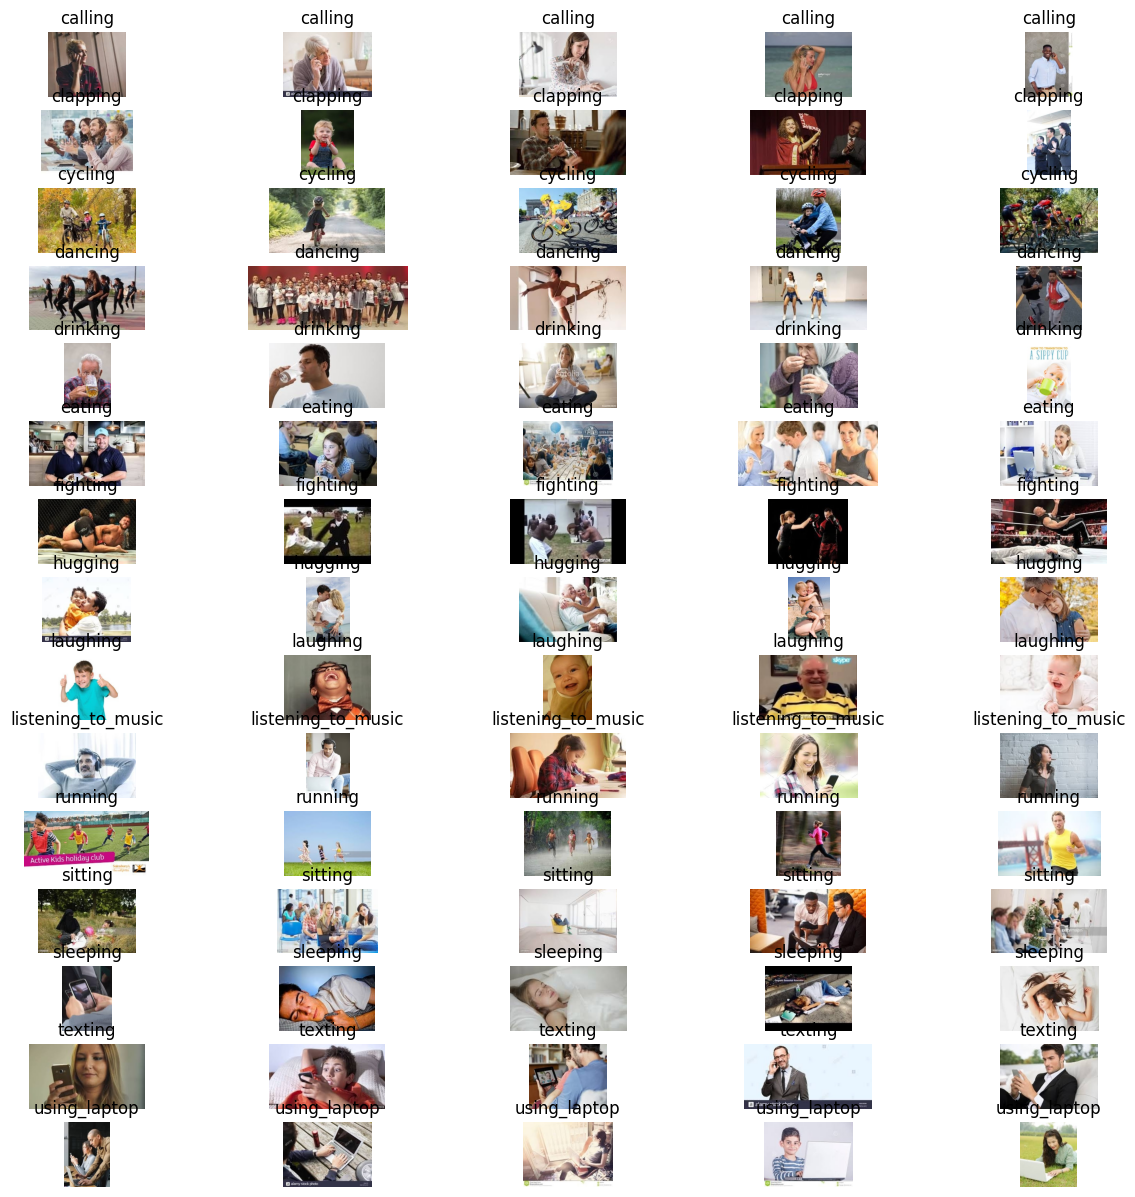

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta de la carpeta de entrenamiento
train_path = '/content/dataset/HumanActionRecognition/train'

# Definir las carpetas de clases
class_folders = ['calling', 'clapping', 'cycling', 'dancing', 'drinking',
                 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music',
                 'running', 'sitting', 'sleeping', 'texting', 'using_laptop']

# Crear una matriz para almacenar las imágenes
num_categories = len(class_folders)
num_images_per_category = 5
image_matrix = np.empty((num_categories, num_images_per_category), dtype=object)

# Llenar la matriz con imágenes al azar de cada categoría
for i, class_folder in enumerate(class_folders):
    # Obtener la ruta completa de la carpeta de clase
    class_path = os.path.join(train_path, class_folder)

    # Obtener una lista de archivos en la carpeta de clase
    file_list = os.listdir(class_path)

    # Seleccionar 5 imágenes al azar de la carpeta de clase
    random_files = random.sample(file_list, num_images_per_category)

    # Almacenar las imágenes en la matriz
    for j, file_name in enumerate(random_files):
        # Obtener la ruta completa de la imagen
        image_path = os.path.join(class_path, file_name)

        # Cargar la imagen y almacenarla en la matriz
        image = plt.imread(image_path)
        image_matrix[i, j] = image

# Mostrar la matriz de imágenes
plt.figure(figsize=(15, 15))
for i in range(num_categories):
    for j in range(num_images_per_category):
        plt.subplot(num_categories, num_images_per_category, i * num_images_per_category + j + 1)
        plt.imshow(image_matrix[i, j])
        plt.axis('off')
        plt.title(class_folders[i])

plt.show()


In [ ]:
!mkdir /content/dataset/validation

In [ ]:
import os
import shutil
import random

# Definir las rutas de las carpetas 'test' y 'validation'
test_folder = '/content/dataset/HumanActionRecognition/test'
validation_folder = '/content/dataset/validation'

# Crear la carpeta 'validation' si no existe
if not os.path.exists(validation_folder):
    os.makedirs(validation_folder)

# Obtener la lista de archivos en la carpeta 'test'
test_files = os.listdir(test_folder)

# Calcular el número de imágenes a mover (10% de las imágenes)
num_images_to_move = int(len(test_files) * 0.10)

# Seleccionar de manera aleatoria las imágenes a mover
images_to_move = random.sample(test_files, num_images_to_move)

# Mover las imágenes seleccionadas a la carpeta 'validation'
for image_file in images_to_move:
    source_path = os.path.join(test_folder, image_file)
    destination_path = os.path.join(validation_folder, image_file)
    shutil.move(source_path, destination_path)

print(f'Se han movido {num_images_to_move} imágenes de test a validation.')


Se han movido 541 imágenes de test a validation.


In [ ]:
rm -r /content/dataset/train

In [ ]:
#El preprocesamiento de las imágenes esta en el siguiente punto

<font color='red'>Punto 2 (1.0). Cree y entrene un modelo para clasificación usando como base la arquitectura VGG16.

(0.5) Utilice los conocimientos adquiridos para entrenar y validar su modelo. Usted deberá hacer uso de: Gráficas de Accuracy / Loss, MaAtriz de confusión y reporte de clasificación (F1-Score, Recall, Precision)

(0.5) Analice los resultados obtenidos con las diferentes herramientas, dando una explicación que incluya las difernetes métricas y que sean consecuentes con los reultados obtenidos.

Importing the required libraries

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Cargar datos y etiquetas
train_csv = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set1.csv")
test_csv = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set2.csv")
train_fol = glob.glob("/content/dataset/trainSplit/*")
test_fol = glob.glob("/content/dataset/testSplit/*")
filename_train = train_csv['filename']
situation_train = train_csv['label']
filename_test = test_csv['filename']
situation_test = test_csv['label']

# Definir rutas de las imágenes
train_image_paths = [os.path.join("/content/dataset/trainSplit", fname) for fname in filename_train]
test_image_paths = [os.path.join("/content/dataset/testSplit", fname) for fname in filename_test]

# Parámetros generales
input_shape = (224, 224, 3)  # Tamaño de entrada para VGG16
num_classes = len(np.unique(situation_train))
batch_size = 32
epochs = 20

# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': train_image_paths, 'label': situation_train}),
    x_col='filename',
    y_col='label',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': test_image_paths, 'label': situation_test}),
    x_col='filename',
    y_col='label',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Definir y compilar el modelo VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Congelar capas base
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Guardar el modelo entrenado si es necesario
model.save('vgg16_classification_model.h5')


Found 3123 validated image filenames belonging to 15 classes.
Found 3123 validated image filenames belonging to 15 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3177 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3177 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/20
98/98 [==============================] - 70s 589ms/step - loss: 2.7823 - accuracy: 0.2379 - val_loss: 1.9068 - val_accuracy: 0.3945
Epoch 2/20
98/98 [==============================] - 59s 605ms/step - loss: 1.9613 - accuracy: 0.3689 - val_loss: 1.9172 - val_accuracy: 0.3810
Epoch 3/20
98/98 [==============================] - 58s 598ms/step - loss: 1.8364 - accuracy: 0.4051 - val_loss: 1.6543 - val_accuracy: 0.4681
Epoch 4/20
98/98 [==============================] - 67s 687ms/step - loss: 1.6776 - accuracy: 0.4425 - val_loss: 1.6370 - val_accuracy: 0.4701
Epoch 5/20
98/98 [==============================] - 58s 591ms/step - loss: 1.5910 - accuracy: 0.4867 - val_loss: 1.6129 - val_accuracy: 0.4832
Epoch 6/20
98/98 [==============================] - 60s 615ms/step - loss: 1.5291 - accuracy: 0.4979 - val_loss: 1.6501 - val_accuracy: 0.4912
Epoch 7/20
98/98 [==============================] - 58s 589ms/step - loss: 1.5167 - accuracy: 0.5104 - val_loss: 1.4985 - val_accuracy: 0.5184

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


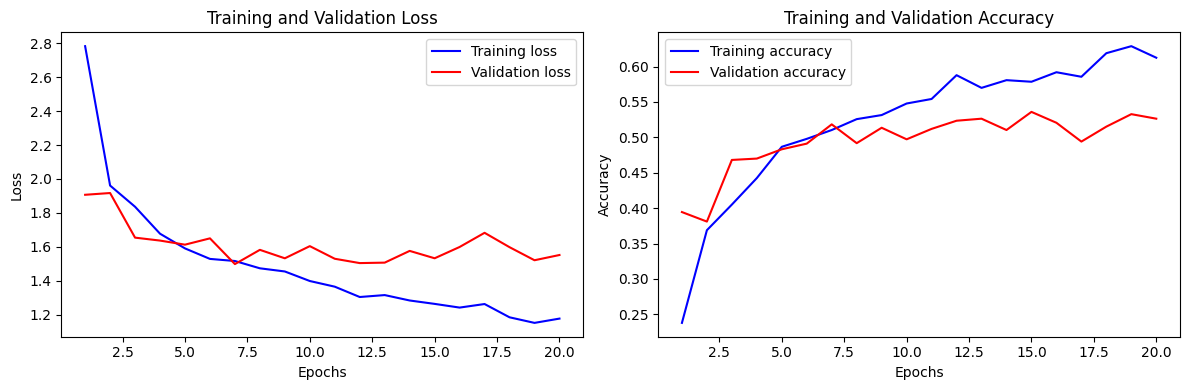

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


98/98 [==============================] - 13s 132ms/step


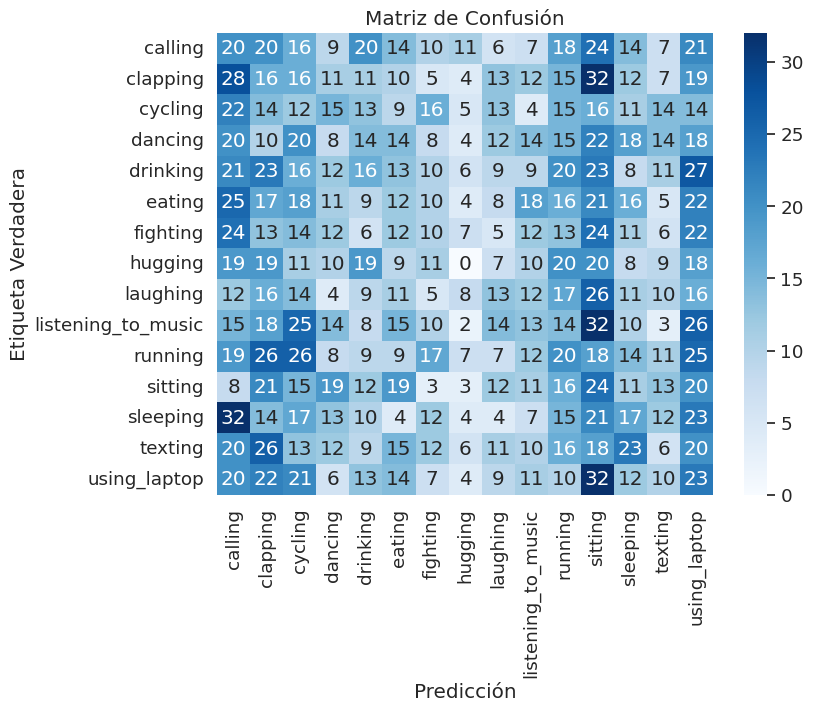


Reporte de Clasificación:
                    precision    recall  f1-score   support

           calling       0.07      0.09      0.08       217
          clapping       0.06      0.08      0.07       211
           cycling       0.05      0.06      0.05       193
           dancing       0.05      0.04      0.04       211
          drinking       0.09      0.07      0.08       224
            eating       0.07      0.06      0.06       212
          fighting       0.07      0.05      0.06       191
           hugging       0.00      0.00      0.00       190
          laughing       0.09      0.07      0.08       184
listening_to_music       0.08      0.06      0.07       219
           running       0.08      0.09      0.09       228
           sitting       0.07      0.12      0.09       207
          sleeping       0.09      0.08      0.08       205
           texting       0.04      0.03      0.03       217
      using_laptop       0.07      0.11      0.09       214

          a

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_generator)

# Convertir las predicciones a etiquetas (clases)
predicted_labels = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de prueba
true_labels = test_generator.classes

# Calcular la matriz de confusión
confusion = confusion_matrix(true_labels, predicted_labels)

# Etiquetas de clases
class_names = list(test_generator.class_indices.keys())

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Calcular el reporte de clasificación (F1-Score, Recall, Precision)
classification_report_str = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nReporte de Clasificación:")
print(classification_report_str)

Edite aquí el análisis para el punto 2.2

<font color='red'>Punto 3 (2.0). Usando métodos de regularización para mejorar el "***performance***" de su  modelo base.

(1.0) Usted podrá combinar diferentes métricas de regularización con el fin de obtener 3 modelos (**modelos regularizados**) que superen los resultados del modelo base.
<font color='red'> [Nota: Los 3 modelos deben mostrar graficos de Acurracy que corroboren la eliminación del overfitting. Tenga en cuenta además que los 3 modelos deberán mantener un Val-accuracy superior al 70%]

(0.25) Haciendo uso de transfer learning entrene un cuarto modelo. <font color='red'> [Nota: No olvide mostrar el grafico de Acurracy que corrobore la eliminación del overfitting y mantener un Val-accuracy superior al 70%]

(0.75) Realice un análisis comparativo de los resultados obtenidos con el mejor de los 3 modelos regularizados y el modelo 4.

# **Modelo regularizado - Ridge**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.regularizers import l2


# Cargar datos y etiquetas
train_csv_ridge = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set1.csv")
test_csv_ridge = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set2.csv")
train_fol_ridge = glob.glob("/content/dataset/trainSplit/*")
test_fol_ridge = glob.glob("/content/dataset/testSplit/*")
filename_train_ridge = train_csv_ridge['filename']
situation_train_ridge = train_csv_ridge['label']
filename_test_ridge = test_csv_ridge['filename']
situation_test_ridge = test_csv_ridge['label']

# Definir rutas de las imágenes
train_image_paths_ridge = [os.path.join("/content/dataset/trainSplit", fname) for fname in filename_train_ridge]
test_image_paths_ridge = [os.path.join("/content/dataset/testSplit", fname) for fname in filename_test_ridge]

# Parámetros generales
input_shape_ridge = (224, 224, 3)  # Tamaño de entrada para VGG16
num_classes_ridge = len(np.unique(situation_train_ridge))
batch_size_ridge = 32
epochs_ridge = 60

# Preprocesamiento de imágenes
train_datagen_ridge = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen_ridge = ImageDataGenerator(rescale=1.0/255.0)

train_generator_ridge = train_datagen_ridge.flow_from_dataframe(
    pd.DataFrame({'filename': train_image_paths_ridge, 'label': situation_train_ridge}),
    x_col='filename',
    y_col='label',
    target_size=input_shape_ridge[:2],
    batch_size=batch_size_ridge,
    class_mode='categorical'
)

test_generator_ridge = test_datagen_ridge.flow_from_dataframe(
    pd.DataFrame({'filename': test_image_paths_ridge, 'label': situation_test_ridge}),
    x_col='filename',
    y_col='label',
    target_size=input_shape_ridge[:2],
    batch_size=batch_size_ridge,
    class_mode='categorical'
)

# Definir y compilar el modelo VGG16
base_model_ridge = VGG16(weights='imagenet', include_top=False, input_shape=input_shape_ridge)
model_ridge = Sequential([
    base_model_ridge,
    Flatten(),
    Dense(248, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(num_classes_ridge, activation='softmax', kernel_regularizer=l2(0.01))  # Agregar regularización Ridge
])

# Congelar capas base
for layer in base_model_ridge.layers:
    layer.trainable = False

model_ridge.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_ridge = model_ridge.fit(train_generator_ridge, epochs=epochs_ridge, validation_data=test_generator_ridge)

# Evaluar el modelo en el conjunto de prueba
test_loss_ridge, test_acc_ridge = model_ridge.evaluate(test_generator_ridge)
print(f'Test accuracy: {test_acc_ridge}')

# Guardar el modelo entrenado si es necesario
model_ridge.save('vgg16_classification_model_ridge.h5')


Found 3156 validated image filenames belonging to 15 classes.
Found 3155 validated image filenames belonging to 15 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3144 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3145 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/60
99/99 [==============================] - 61s 585ms/step - loss: 4.6106 - accuracy: 0.1375 - val_loss: 3.0638 - val_accuracy: 0.1851
Epoch 2/60
99/99 [==============================] - 55s 559ms/step - loss: 2.8367 - accuracy: 0.2053 - val_loss: 2.5130 - val_accuracy: 0.2957
Epoch 3/60
99/99 [==============================] - 57s 573ms/step - loss: 2.5560 - accuracy: 0.2579 - val_loss: 2.4070 - val_accuracy: 0.2951
Epoch 4/60
99/99 [==============================] - 56s 564ms/step - loss: 2.4846 - accuracy: 0.2500 - val_loss: 2.3167 - val_accuracy: 0.3287
Epoch 5/60
99/99 [==============================] - 67s 672ms/step - loss: 2.4261 - accuracy: 0.2690 - val_loss: 2.1858 - val_accuracy: 0.3632
Epoch 6/60
99/99 [==============================] - 55s 555ms/step - loss: 2.4435 - accuracy: 0.2573 - val_loss: 2.3569 - val_accuracy: 0.2998
Epoch 7/60
99/99 [==============================] - 60s 606ms/step - loss: 2.3854 - accuracy: 0.2814 - val_loss: 2.2238 - val_accuracy: 0.3414

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


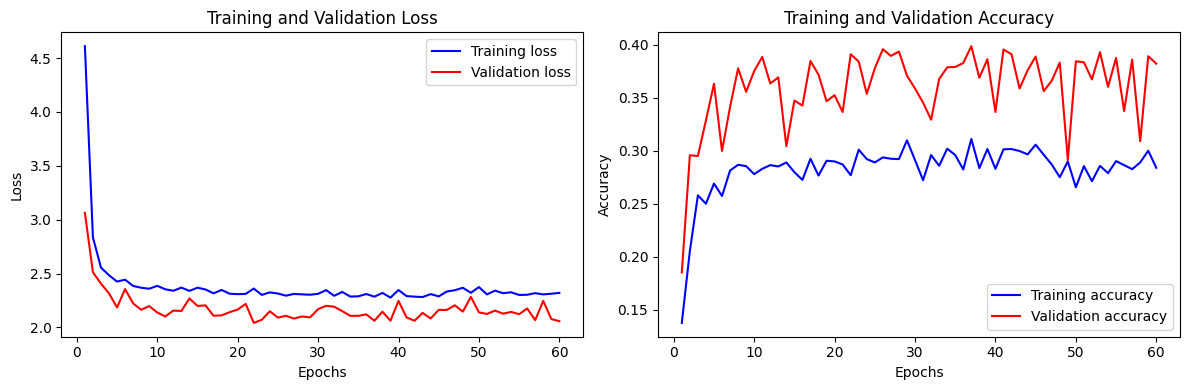

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento
train_loss_ridge = history_ridge.history['loss']
val_loss_ridge = history_ridge.history['val_loss']
train_acc_ridge = history_ridge.history['accuracy']
val_acc_ridge = history_ridge.history['val_accuracy']
epochs_ridge = range(1, len(train_loss_ridge) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_ridge, train_loss_ridge, 'b', label='Training loss')
plt.plot(epochs_ridge, val_loss_ridge, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs_ridge, train_acc_ridge, 'b', label='Training accuracy')
plt.plot(epochs_ridge, val_acc_ridge, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

99/99 [==============================] - 13s 130ms/step


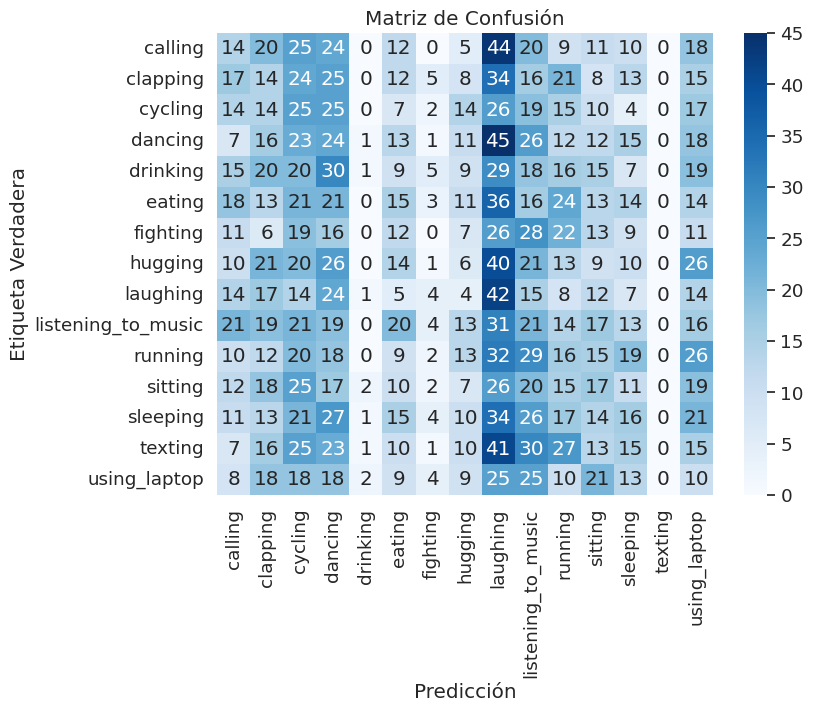


Reporte de Clasificación:
                    precision    recall  f1-score   support

           calling       0.07      0.07      0.07       212
          clapping       0.06      0.07      0.06       212
           cycling       0.08      0.13      0.10       192
           dancing       0.07      0.11      0.09       224
          drinking       0.11      0.00      0.01       213
            eating       0.09      0.07      0.08       219
          fighting       0.00      0.00      0.00       180
           hugging       0.04      0.03      0.03       217
          laughing       0.08      0.23      0.12       181
listening_to_music       0.06      0.09      0.08       229
           running       0.07      0.07      0.07       221
           sitting       0.09      0.08      0.08       201
          sleeping       0.09      0.07      0.08       230
           texting       0.00      0.00      0.00       234
      using_laptop       0.04      0.05      0.04       190

          a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions_ridge = model_ridge.predict(test_generator_ridge)

# Convertir las predicciones a etiquetas (clases)
predicted_labels_ridge = np.argmax(predictions_ridge, axis=1)

# Obtener las etiquetas reales del conjunto de prueba
true_labels_ridge = test_generator_ridge.classes

# Calcular la matriz de confusión
confusio_ridgen = confusion_matrix(true_labels_ridge, predicted_labels_ridge)

# Etiquetas de clases
class_names_ridge = list(test_generator_ridge.class_indices.keys())

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusio_ridgen, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_ridge, yticklabels=class_names_ridge)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Calcular el reporte de clasificación (F1-Score, Recall, Precision)
classification_report_str_ridge = classification_report(true_labels_ridge, predicted_labels_ridge, target_names=class_names_ridge)
print("\nReporte de Clasificación:")
print(classification_report_str_ridge)

(0.25) Edite aqui el analisis del punto 3.3

# **Modelo regularizado - LASSO**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.regularizers import l2


# Cargar datos y etiquetas
train_csv_lasso = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set1.csv")
test_csv_lasso = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set2.csv")
train_fol_lasso = glob.glob("/content/dataset/trainSplit/*")
test_fol_lasso = glob.glob("/content/dataset/testSplit/*")
filename_train_lasso = train_csv_lasso['filename']
situation_train_lasso = train_csv_lasso['label']
filename_test_lasso = test_csv_lasso['filename']
situation_test_lasso = test_csv_lasso['label']

# Definir rutas de las imágenes
train_image_paths_lasso = [os.path.join("/content/dataset/trainSplit", fname) for fname in filename_train_lasso]
test_image_paths_lasso = [os.path.join("/content/dataset/testSplit", fname) for fname in filename_test_lasso]

# Parámetros generales
input_shape_lasso = (224, 224, 3)  # Tamaño de entrada para VGG16
num_classes_lasso = len(np.unique(situation_train_lasso))
batch_size_lasso = 32
epochs_lasso = 30

# Preprocesamiento de imágenes
train_datagen_lasso = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen_lasso = ImageDataGenerator(rescale=1.0/255.0)

train_generator_lasso = train_datagen_lasso.flow_from_dataframe(
    pd.DataFrame({'filename': train_image_paths_lasso, 'label': situation_train_lasso}),
    x_col='filename',
    y_col='label',
    target_size=input_shape_lasso[:2],
    batch_size=batch_size_lasso,
    class_mode='categorical'
)

test_generator_lasso = test_datagen_lasso.flow_from_dataframe(
    pd.DataFrame({'filename': test_image_paths_lasso, 'label': situation_test_lasso}),
    x_col='filename',
    y_col='label',
    target_size=input_shape_lasso[:2],
    batch_size=batch_size_lasso,
    class_mode='categorical'
)

# Definir y compilar el modelo VGG16
base_model_lasso = VGG16(weights='imagenet', include_top=False, input_shape=input_shape_lasso)
model_lasso = Sequential([
    base_model_lasso,
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Agregar regularización Ridge
    Dense(num_classes_lasso, activation='softmax', kernel_regularizer=l2(0.01))  # Agregar regularización Ridge
])

# Congelar capas base
for layer in base_model_lasso.layers:
    layer.trainable = False

model_lasso.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_lasso = model_lasso.fit(train_generator_lasso, epochs=epochs_lasso, validation_data=test_generator_lasso)

# Evaluar el modelo en el conjunto de prueba
test_loss_lasso, test_acc_lasso = model_lasso.evaluate(test_generator_lasso)
print(f'Test accuracy: {test_acc_lasso}')

# Guardar el modelo entrenado si es necesario
model_lasso.save('vgg16_classification_model_lasso.h5')


Found 3177 validated image filenames belonging to 15 classes.
Found 3176 validated image filenames belonging to 15 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3123 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3124 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/30
100/100 [==============================] - 62s 585ms/step - loss: 4.5668 - accuracy: 0.2383 - val_loss: 2.9482 - val_accuracy: 0.3508
Epoch 2/30
100/100 [==============================] - 61s 609ms/step - loss: 2.7344 - accuracy: 0.3494 - val_loss: 2.4170 - val_accuracy: 0.4156
Epoch 3/30
100/100 [==============================] - 58s 585ms/step - loss: 2.4667 - accuracy: 0.3736 - val_loss: 2.3067 - val_accuracy: 0.4093
Epoch 4/30
100/100 [==============================] - 60s 600ms/step - loss: 2.3901 - accuracy: 0.3941 - val_loss: 2.3439 - val_accuracy: 0.3807
Epoch 5/30
100/100 [==============================] - 60s 598ms/step - loss: 2.2740 - accuracy: 0.4177 - val_loss: 2.2506 - val_accuracy: 0.4326
Epoch 6/30
100/100 [==============================] - 60s 605ms/step - loss: 2.2175 - accuracy: 0.4196 - val_loss: 2.0922 - val_accuracy: 0.4663
Epoch 7/30
100/100 [==============================] - 59s 590ms/step - loss: 2.2158 - accuracy: 0.4202 - val_loss: 2.0893 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


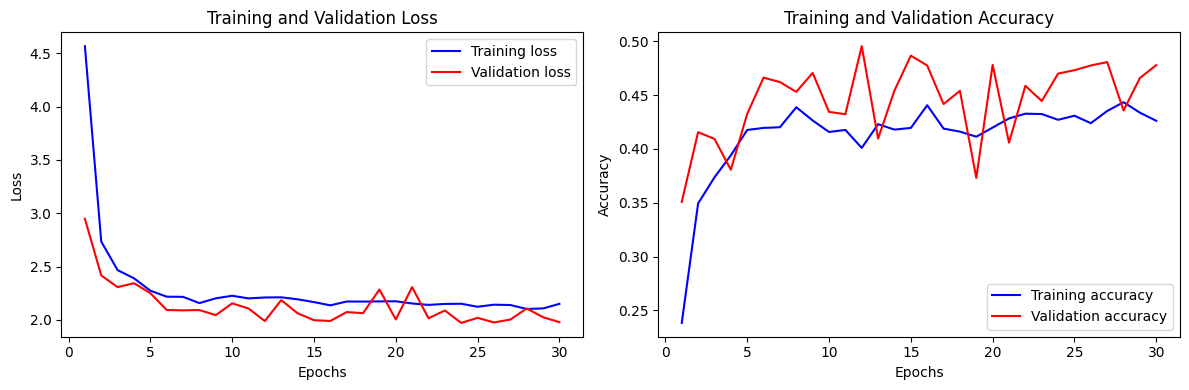

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento
train_loss_lasso = history_lasso.history['loss']
val_loss_lasso = history_lasso.history['val_loss']
train_acc_lasso = history_lasso.history['accuracy']
val_acc_lasso = history_lasso.history['val_accuracy']
epochs_lasso = range(1, len(train_loss_lasso) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_lasso, train_loss_lasso, 'b', label='Training loss')
plt.plot(epochs_lasso, val_loss_lasso, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs_lasso, train_acc_lasso, 'b', label='Training accuracy')
plt.plot(epochs_lasso, val_acc_lasso, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

100/100 [==============================] - 12s 117ms/step


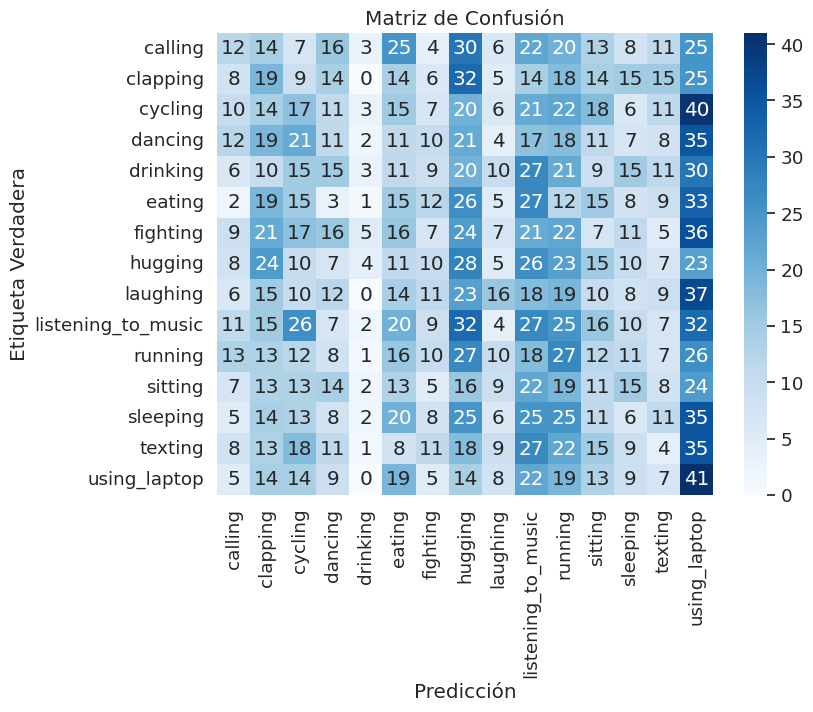


Reporte de Clasificación:
                    precision    recall  f1-score   support

           calling       0.10      0.06      0.07       216
          clapping       0.08      0.09      0.09       208
           cycling       0.08      0.08      0.08       221
           dancing       0.07      0.05      0.06       207
          drinking       0.10      0.01      0.02       212
            eating       0.07      0.07      0.07       202
          fighting       0.06      0.03      0.04       224
           hugging       0.08      0.13      0.10       211
          laughing       0.15      0.08      0.10       208
listening_to_music       0.08      0.11      0.09       243
           running       0.09      0.13      0.10       211
           sitting       0.06      0.06      0.06       191
          sleeping       0.04      0.03      0.03       214
           texting       0.03      0.02      0.02       209
      using_laptop       0.09      0.21      0.12       199

          a

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions_lasso = model_lasso.predict(test_generator_lasso)

# Convertir las predicciones a etiquetas (clases)
predicted_labels_lasso = np.argmax(predictions_lasso, axis=1)

# Obtener las etiquetas reales del conjunto de prueba
true_labels_lasso = test_generator_lasso.classes

# Calcular la matriz de confusión
confusio_lasson = confusion_matrix(true_labels_lasso, predicted_labels_lasso)

# Etiquetas de clases
class_names_lasso = list(test_generator_lasso.class_indices.keys())

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusio_lasson, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_lasso, yticklabels=class_names_lasso)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Calcular el reporte de clasificación (F1-Score, Recall, Precision)
classification_report_str_lasso = classification_report(true_labels_lasso, predicted_labels_lasso, target_names=class_names_lasso)
print("\nReporte de Clasificación:")
print(classification_report_str_lasso)

# **Modelo regularizado - Batch Normalization**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import BatchNormalization


# Cargar datos y etiquetas
train_csv_net = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set1.csv")
test_csv_net = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set2.csv")
train_fol_net = glob.glob("/content/dataset/trainSplit/*")
test_fol_net = glob.glob("/content/dataset/testSplit/*")
filename_train_net = train_csv_net['filename']
situation_train_net = train_csv_net['label']
filename_test_net = test_csv_net['filename']
situation_test_net = test_csv_net['label']

# Definir rutas de las imágenes
train_image_paths_net = [os.path.join("/content/dataset/trainSplit", fname) for fname in filename_train_net]
test_image_paths_net = [os.path.join("/content/dataset/testSplit", fname) for fname in filename_test_net]

# Parámetros generales
input_shape_net = (224, 224, 3)  # Tamaño de entrada para VGG16
num_classes_net = len(np.unique(situation_train_net))
batch_size_net = 32
epochs_net = 30

# Preprocesamiento de imágenes
train_datagen_net = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen_net = ImageDataGenerator(rescale=1.0/255.0)

train_generator_net = train_datagen_net.flow_from_dataframe(
    pd.DataFrame({'filename': train_image_paths_net, 'label': situation_train_net}),
    x_col='filename',
    y_col='label',
    target_size=input_shape_net[:2],
    batch_size=batch_size_net,
    class_mode='categorical'
)

test_generator_net = test_datagen_net.flow_from_dataframe(
    pd.DataFrame({'filename': test_image_paths_net, 'label': situation_test_net}),
    x_col='filename',
    y_col='label',
    target_size=input_shape_net[:2],
    batch_size=batch_size_net,
    class_mode='categorical'
)

# Definir y compilar el modelo VGG16
base_model_net = VGG16(weights='imagenet', include_top=False, input_shape=input_shape_net)
model_net = Sequential([
    base_model_net,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),  # Capa de Batch Normalization
    Dense(num_classes_net, activation='softmax')
])

# Congelar capas base
for layer in base_model_net.layers:
    layer.trainable = False

model_net.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_net = model_net.fit(train_generator_net, epochs=epochs_net, validation_data=test_generator_net)

# Evaluar el modelo en el conjunto de prueba
test_loss_net, test_acc_net = model_net.evaluate(test_generator_net)
print(f'Test accuracy: {test_acc_net}')

# Guardar el modelo entrenado si es necesario
model_net.save('vgg16_classification_model_net.h5')


Found 3177 validated image filenames belonging to 15 classes.
Found 3176 validated image filenames belonging to 15 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3123 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3124 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/30
100/100 [==============================] - 63s 595ms/step - loss: 2.2133 - accuracy: 0.3277 - val_loss: 3.6111 - val_accuracy: 0.2661
Epoch 2/30
100/100 [==============================] - 70s 699ms/step - loss: 1.7405 - accuracy: 0.4419 - val_loss: 1.7672 - val_accuracy: 0.4597
Epoch 3/30
100/100 [==============================] - 59s 586ms/step - loss: 1.6092 - accuracy: 0.4869 - val_loss: 2.6609 - val_accuracy: 0.3627
Epoch 4/30
100/100 [==============================] - 61s 613ms/step - loss: 1.5158 - accuracy: 0.5175 - val_loss: 1.8911 - val_accuracy: 0.4503
Epoch 5/30
100/100 [==============================] - 61s 608ms/step - loss: 1.5008 - accuracy: 0.5178 - val_loss: 1.5910 - val_accuracy: 0.5085
Epoch 6/30
100/100 [==============================] - 60s 596ms/step - loss: 1.4116 - accuracy: 0.5461 - val_loss: 1.6978 - val_accuracy: 0.5050
Epoch 7/30
100/100 [==============================] - 68s 682ms/step - loss: 1.3563 - accuracy: 0.5631 - val_loss: 1.6493 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


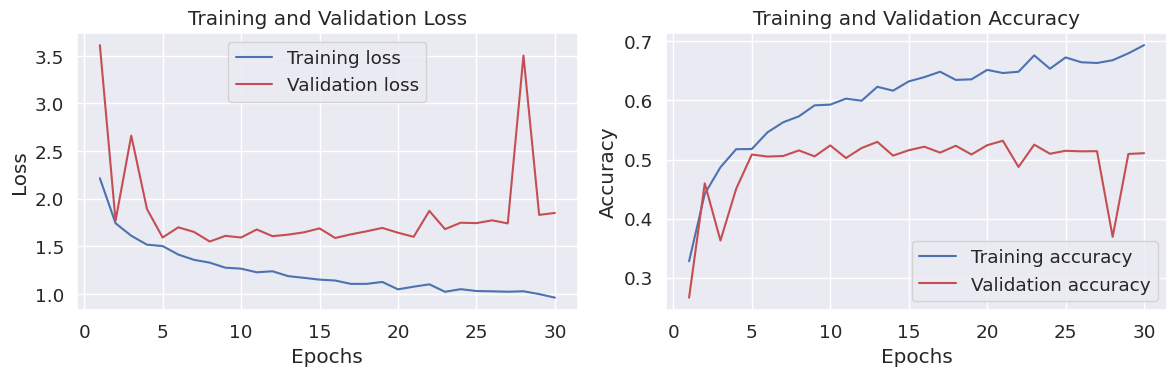

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento
train_loss_net = history_net.history['loss']
val_loss_net = history_net.history['val_loss']
train_acc_net = history_net.history['accuracy']
val_acc_net = history_net.history['val_accuracy']
epochs_net = range(1, len(train_loss_net) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_net, train_loss_net, 'b', label='Training loss')
plt.plot(epochs_net, val_loss_net, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs_net, train_acc_net, 'b', label='Training accuracy')
plt.plot(epochs_net, val_acc_net, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

100/100 [==============================] - 12s 121ms/step


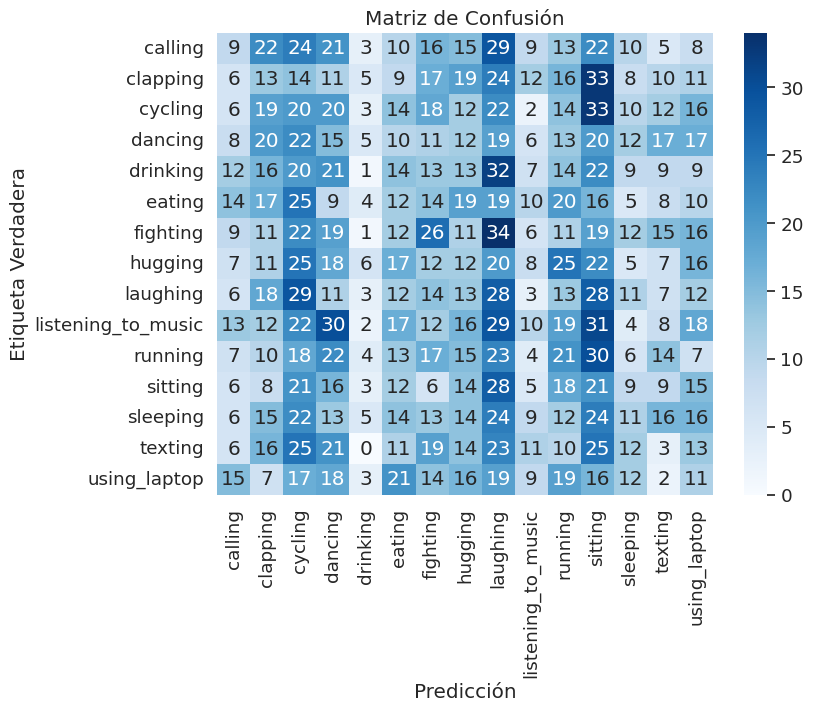


Reporte de Clasificación:
                    precision    recall  f1-score   support

           calling       0.07      0.04      0.05       216
          clapping       0.06      0.06      0.06       208
           cycling       0.06      0.09      0.07       221
           dancing       0.06      0.07      0.06       207
          drinking       0.02      0.00      0.01       212
            eating       0.06      0.06      0.06       202
          fighting       0.12      0.12      0.12       224
           hugging       0.06      0.06      0.06       211
          laughing       0.08      0.13      0.10       208
listening_to_music       0.09      0.04      0.06       243
           running       0.09      0.10      0.09       211
           sitting       0.06      0.11      0.08       191
          sleeping       0.08      0.05      0.06       214
           texting       0.02      0.01      0.02       209
      using_laptop       0.06      0.06      0.06       199

          a

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions_net = model_net.predict(test_generator_net)

# Convertir las predicciones a etiquetas (clases)
predicted_labels_net = np.argmax(predictions_net, axis=1)

# Obtener las etiquetas reales del conjunto de prueba
true_labels_net = test_generator_net.classes

# Calcular la matriz de confusión
confusio_netn = confusion_matrix(true_labels_net, predicted_labels_net)

# Etiquetas de clases
class_names_net = list(test_generator_net.class_indices.keys())

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusio_netn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_net, yticklabels=class_names_net)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Calcular el reporte de clasificación (F1-Score, Recall, Precision)
classification_report_str_net = classification_report(true_labels_net, predicted_labels_net, target_names=class_names_net)
print("\nReporte de Clasificación:")
print(classification_report_str_net)

# Tranferlearning Metodo 1

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Cargar datos y etiquetas
train_csv = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set1.csv")
test_csv = pd.read_csv("/content/dataset/HumanActionRecognition/Training_set2.csv")
train_fol = glob.glob("/content/dataset/trainSplit/*")
test_fol = glob.glob("/content/dataset/testSplit/*")
filename_train = train_csv['filename']
situation_train = train_csv['label']
filename_test = test_csv['filename']
situation_test = test_csv['label']

# Definir rutas de las imágenes
train_image_paths = [os.path.join("/content/dataset/trainSplit", fname) for fname in filename_train]
test_image_paths = [os.path.join("/content/dataset/testSplit", fname) for fname in filename_test]

# Parámetros generales
input_shape = (299, 299, 3)  # Tamaño de entrada para InceptionV3
num_classes = len(np.unique(situation_train))
batch_size = 32
epochs = 20

# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': train_image_paths, 'label': situation_train}),
    x_col='filename',
    y_col='label',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': test_image_paths, 'label': situation_test}),
    x_col='filename',
    y_col='label',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Cargar el modelo InceptionV3 preentrenado en COCO
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Agregar capas personalizadas al modelo base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Congelar las capas del modelo base (InceptionV3)
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Guardar el modelo entrenado si es necesario
model.save('transfer_learning_inceptionv3_model.h5')


Found 3162 validated image filenames belonging to 15 classes.
Found 3161 validated image filenames belonging to 15 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3138 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3139 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


87910968/87910968 [==============================] - 1s 0us/step


Epoch 1/20
99/99 [==============================] - 113s 1s/step - loss: 2.2434 - accuracy: 0.2830 - val_loss: 1.5247 - val_accuracy: 0.5410
Epoch 2/20
99/99 [==============================] - 88s 885ms/step - loss: 1.7399 - accuracy: 0.4336 - val_loss: 1.3295 - val_accuracy: 0.5840
Epoch 3/20
99/99 [==============================] - 88s 886ms/step - loss: 1.5689 - accuracy: 0.4965 - val_loss: 1.2532 - val_accuracy: 0.6302
Epoch 4/20
99/99 [==============================] - 91s 922ms/step - loss: 1.5052 - accuracy: 0.5155 - val_loss: 1.2043 - val_accuracy: 0.6340
Epoch 5/20
99/99 [==============================] - 87s 879ms/step - loss: 1.4285 - accuracy: 0.5402 - val_loss: 1.1641 - val_accuracy: 0.6419
Epoch 6/20
99/99 [==============================] - 88s 893ms/step - loss: 1.4264 - accuracy: 0.5417 - val_loss: 1.1571 - val_accuracy: 0.6289
Epoch 7/20
99/99 [==============================] - 87s 884ms/step - loss: 1.3864 - accuracy: 0.5465 - val_loss: 1.1262 - val_accuracy: 0.6340
E

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


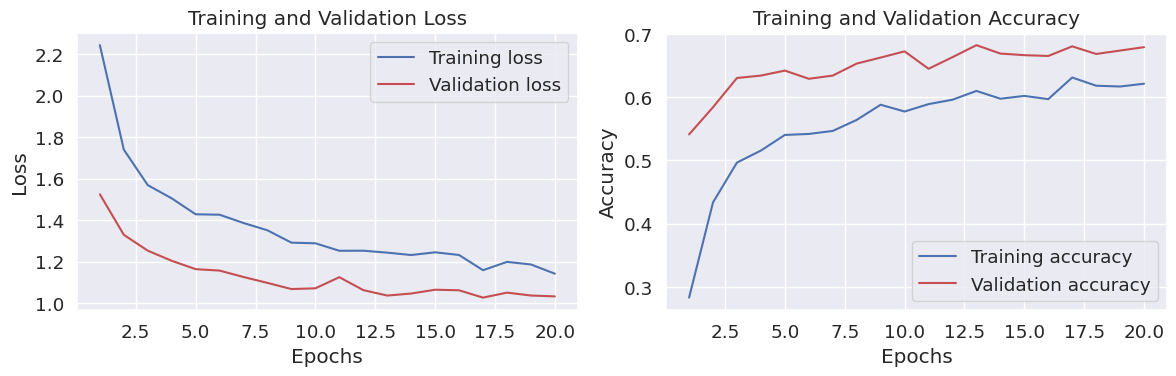

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Graficar pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


99/99 [==============================] - 15s 129ms/step


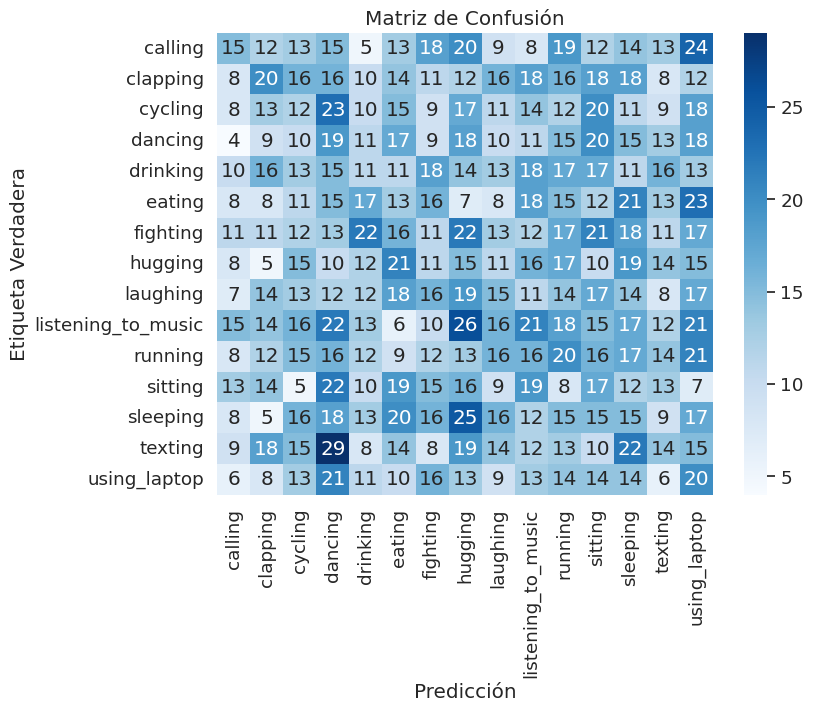


Reporte de Clasificación:
                    precision    recall  f1-score   support

           calling       0.11      0.07      0.09       210
          clapping       0.11      0.09      0.10       213
           cycling       0.06      0.06      0.06       202
           dancing       0.07      0.10      0.08       199
          drinking       0.06      0.05      0.06       213
            eating       0.06      0.06      0.06       205
          fighting       0.06      0.05      0.05       227
           hugging       0.06      0.08      0.07       199
          laughing       0.08      0.07      0.08       207
listening_to_music       0.10      0.09      0.09       242
           running       0.09      0.09      0.09       217
           sitting       0.07      0.09      0.08       199
          sleeping       0.06      0.07      0.07       220
           texting       0.08      0.06      0.07       220
      using_laptop       0.08      0.11      0.09       188

          a

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_generator)

# Convertir las predicciones a etiquetas (clases)
predicted_labels = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de prueba
true_labels = test_generator.classes

# Calcular la matriz de confusión
confusion = confusion_matrix(true_labels, predicted_labels)

# Etiquetas de clases
class_names = list(test_generator.class_indices.keys())

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Calcular el reporte de clasificación (F1-Score, Recall, Precision)
classification_report_str = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nReporte de Clasificación:")
print(classification_report_str)

Dadas las graficas y haciendo un comparativo en funcion de valores como el accuracy, loss y matriz de confusion de cada modelo con metodos de regularizacion diferentes, e incluyendo el modelo de transfer learning, podemos concluir que:



*   El metodo de transfer learning se evidencia como el modelo con la mejor evaluacion y resultados obtenidos entre todos los seleccionados.

*   Lo anterior resulta ser un argumento no suficiente para concluir esto, pero a partir de diferentes situaciones, se afirma que el dataset, si bien contiene un tamaño voluminoso de datos, estos presentan una alta dificultad para diferenciarse entre los conjuntos de imagenes de las distintas categorias proporcionadas, lo cual podría llegar ser un porcentaje importante de la razon que provoca la dificultad y  la eficiencia del entrenamiento en los modelos que no se generan a partir de unos pesos dados con otro entrenamiento como el de transfer learning, esto sumado al hecho de que el dataset carecia completamente de labels en el conjunto de testeo, por lo que se recurrio a realizar un recorte importante y divivir el conjunto de datos de entrenamiento para obtener de este el conjunto de testeo.

*   Lo anterior tampoco es totalitario y excluyente de otras razones, como puede ser, que los modelos entrenados a partir de metodos de regularizacion evidencian la necesidad de un entrenamiento con mayor extension para superar el umbral de accuracy del 70% (no realizado debido a la falta de recursos computacionales). O que solo se aplicaron mecanismos regularizadores aislados para cada modelo y no un conjunto de ellos.

*     Por otro lado, el modelo de tranfer learning, al ser replicado de un modelo bastante estable como Inception de COCO dataset, y con unos pesos efectivos, tuvo una ventaja superior al momento de empezar su entrenamiento y percibir las pequeñas diferencias entre los conjuntos de datos de las categorias del dataset a estudia

# Punto 4
<font color='red'> Punto 4 (1.0). Comprendiendo mejor su Clasificador</font>.

A partir de la lectura juiciosa de este enlace: [VISUALIZING FEATURE MAPS](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/).

Realice una comparación visual de las diferentes capas convolucionales (entendiendo que estas, son las que producen los diferentes feature maps).<font color='red'>[Nota: Para esta parte, utilice el conjunto de datos de TEST]</font>.

Acompañe esta comparación visual con un párrafo donde muestre su análisis al respecto.


553467096/553467096 [==============================] - 7s 0us/step


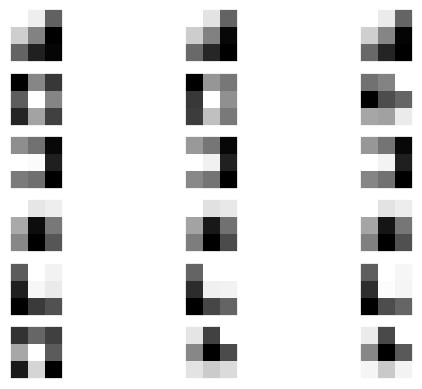

In [ ]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

How to Visualize Feature Maps

1/1 [==============================] - 1s 751ms/step


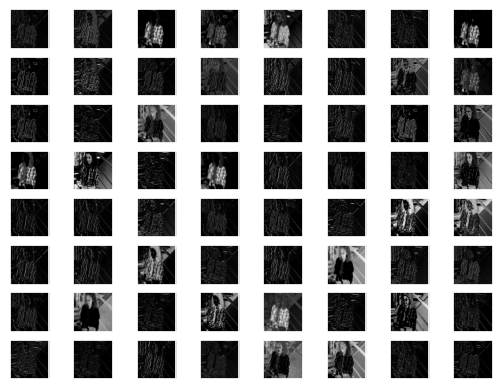

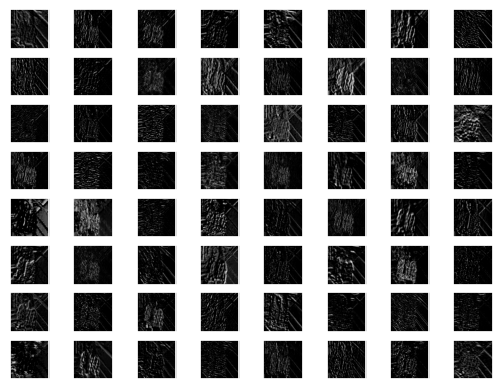

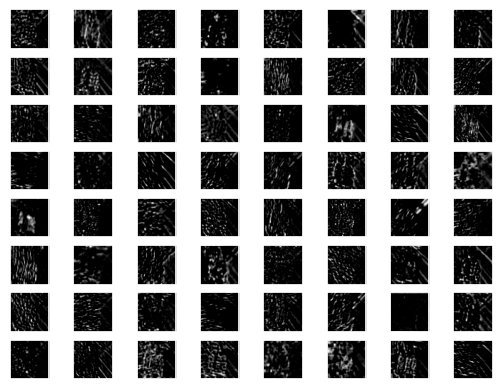

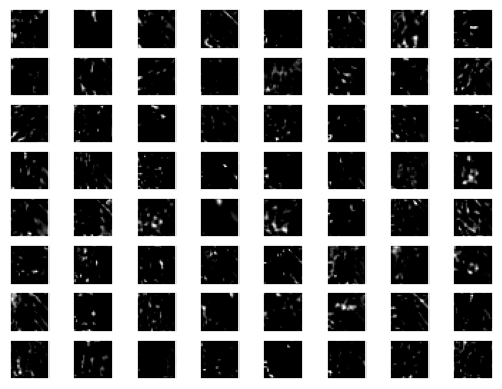

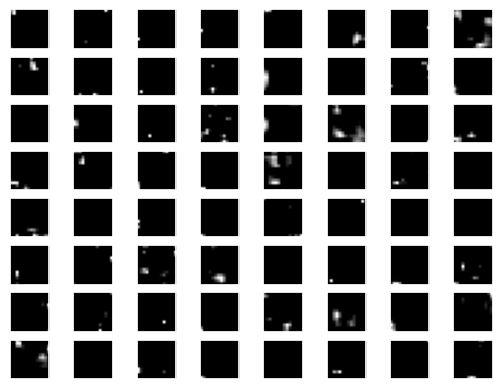

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/dataset/testSplit/Image_1.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

bloque1

1/1 [==============================] - 0s 71ms/step


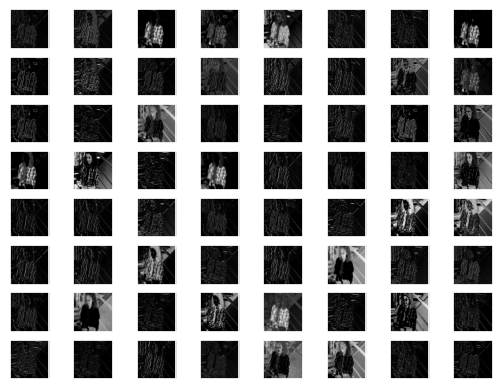

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# Cargar la imagen para cada bloque
img_path = '/content/dataset/testSplit/Image_1.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

# Bloque 1
ixs = [2]
outputs = [model.layers[i].output for i in ixs]
model_block1 = Model(inputs=model.inputs, outputs=outputs)

# Obtener características
feature_maps_block1 = model_block1.predict(img)

# Visualizar características
square = 8
for fmap in feature_maps_block1:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn off axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[:, :, ix-1], cmap='gray')  # Cambio aquí
            ix += 1
    # show the figure
    pyplot.show()

# Repetir para otros bloques (Bloque 2, Bloque 3, Bloque 4 y Bloque 5) aquí


bloque2

1/1 [==============================] - 0s 292ms/step


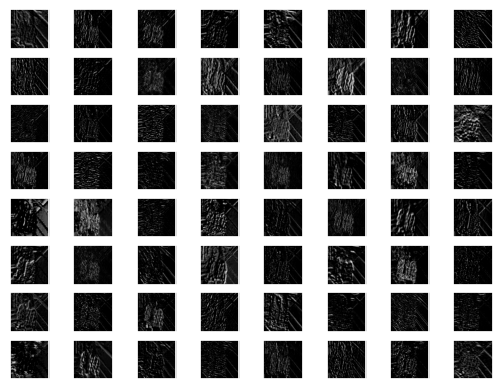

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# Cargar la imagen para cada bloque
img_path = '/content/dataset/testSplit/Image_1.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

# Bloque 2
ixs = [5]
outputs = [model.layers[i].output for i in ixs]
model_block1 = Model(inputs=model.inputs, outputs=outputs)

# Obtener características
feature_maps_block1 = model_block1.predict(img)

# Visualizar características
square = 8
for fmap in feature_maps_block1:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn off axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[:, :, ix-1], cmap='gray')  # Cambio aquí
            ix += 1
    # show the figure
    pyplot.show()

bloque 3

1/1 [==============================] - 0s 241ms/step


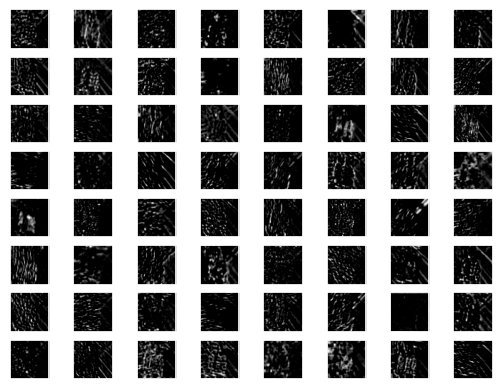

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# Cargar la imagen para cada bloque
img_path = '/content/dataset/testSplit/Image_1.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

# Bloque 3
ixs = [9]
outputs = [model.layers[i].output for i in ixs]
model_block1 = Model(inputs=model.inputs, outputs=outputs)

# Obtener características
feature_maps_block1 = model_block1.predict(img)

# Visualizar características
square = 8
for fmap in feature_maps_block1:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn off axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[:, :, ix-1], cmap='gray')  # Cambio aquí
            ix += 1
    # show the figure
    pyplot.show()

bloque 4

1/1 [==============================] - 0s 228ms/step


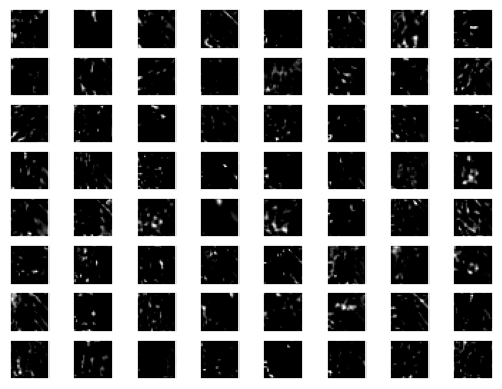

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# Cargar la imagen para cada bloque
img_path = '/content/dataset/testSplit/Image_1.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

# Bloque 4
ixs = [13]
outputs = [model.layers[i].output for i in ixs]
model_block1 = Model(inputs=model.inputs, outputs=outputs)

# Obtener características
feature_maps_block1 = model_block1.predict(img)

# Visualizar características
square = 8
for fmap in feature_maps_block1:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn off axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[:, :, ix-1], cmap='gray')  # Cambio aquí
            ix += 1
    # show the figure
    pyplot.show()

bloque 5

1/1 [==============================] - 0s 227ms/step


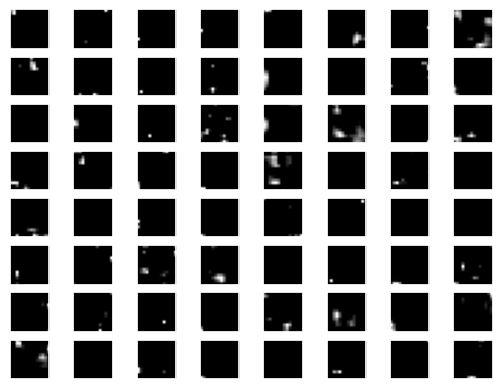

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# Cargar la imagen para cada bloque
img_path = '/content/dataset/testSplit/Image_1.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

# Bloque 5
ixs = [17]
outputs = [model.layers[i].output for i in ixs]
model_block1 = Model(inputs=model.inputs, outputs=outputs)

# Obtener características
feature_maps_block1 = model_block1.predict(img)

# Visualizar características
square = 8
for fmap in feature_maps_block1:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn off axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[:, :, ix-1], cmap='gray')  # Cambio aquí
            ix += 1
    # show the figure
    pyplot.show()

Los mapas de características cercanos a la entrada del modelo capturan detalles muy finos y específicos de la imagen, como bordes y texturas. Estos detalles son útiles para tareas de bajo nivel, como detección de bordes y patrones simples.

A medida que avanzamos en la red hacia capas más profundas, los mapas de características muestran una abstracción progresiva de la información. Esto significa que las características detectadas se vuelven más abstractas y generales, lo que facilita la clasificación de objetos y patrones complejos.
La red VGG16  sigue una jerarquía de características, donde las primeras capas aprenden características simples y las capas posteriores combinan estas características simples para formar características más complejas. Esto es fundamental para la capacidad de las redes neuronales convolucionales para realizar tareas de visión por computadora.

Cuando se  sigue en la red, los mapas de características se vuelven más abstractos y menos interpretables para los humanos. Esto es natural ya que el modelo está aprendiendo representaciones que son útiles para clasificar objetos, pero estas representaciones pueden no tener una interpretación visual directa.

Al tener una capacidad de una red VGG16 para capturar características abstractas y realizar tareas de clasificación efectivas se debe a su capacidad de generalización. Aunque los mapas de características finales pueden parecer abstractos, son esenciales para reconocer patrones en datos de prueba no vistos.

Para tener serteza se resume que los mapas de características en cada bloque de la red VGG16 muestran cómo la información se transforma y abstrae a medida que pasa a través de la red. Esta progresión es esencial para el éxito de las redes neuronales convolucionales en tareas de visión por computadora, ya que les permite aprender representaciones jerárquicas y generalizables de los datos.Pero hay que tener en cuenta que entre mas bloques se realize mas se pierde la capacidad de generalizacion o enfoque de la red.

